In [2]:
import pandas as pd
DF = pd.read_csv('output/inflation-forecast-data.csv')
DF.head()

DATE  D-IPCA       IPCA       GDP  Exchange rate  Interest rate   
0  2000-05-01    0.09   0.119264   98727.0         1.8271      19.420540  \
1  2000-06-01    0.08   2.798932  102685.4         1.8075      18.016159   
2  2000-07-01    0.78  21.130103  103410.4         1.7970      16.903573   
3  2000-08-01    1.99  16.901782  105177.8         1.8084      18.295818   
4  2000-09-01    0.45   2.793071  100307.6         1.8384      15.663411   

   Oil price  Rediscount  
0  27.424203      -8.134  
1  29.831515     -16.626  
2  28.338571       0.000  
3  30.006377      -8.485  
4  32.438571      -8.599

# Data Visualization

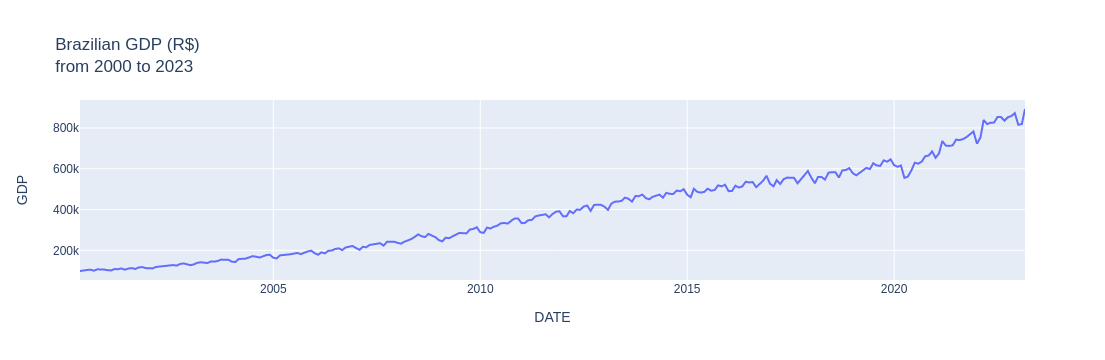

In [3]:
import plotly.express as xp
xp.line(DF, x = 'DATE', y = 'GDP', title = 'Brazilian GDP (R$) <br>from 2000 to 2023')

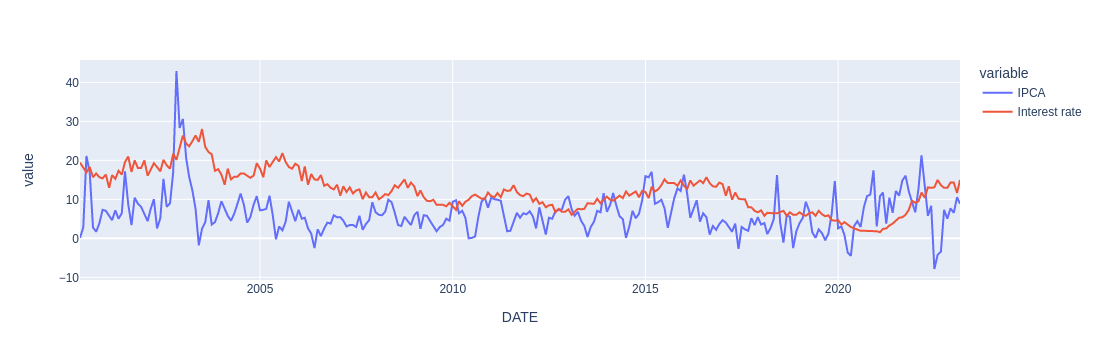

In [4]:
import plotly.express as xp
xp.line(DF, x = 'DATE', y = ['IPCA', 'Interest rate'], title = '')

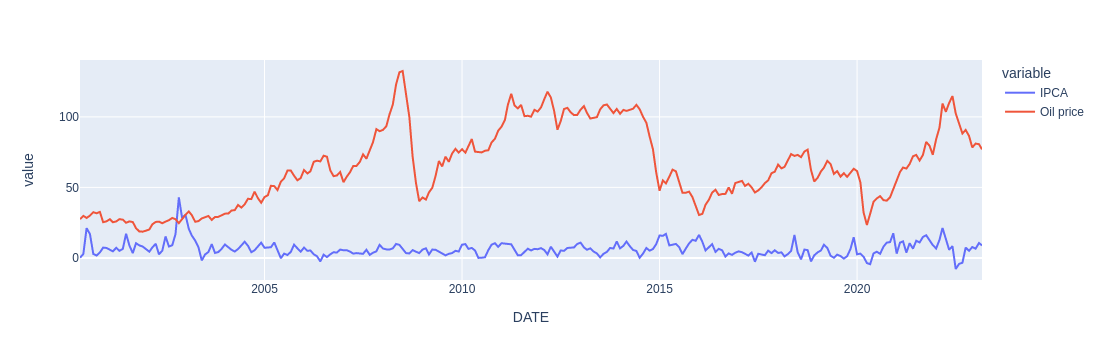

In [5]:
import plotly.express as xp
xp.line(DF, x = 'DATE', y = ['IPCA', 'Oil price'], title = '')

# Frequency Distributions and Q-Q Plots

Q-Q Plots are used to determine if a time series is distributed in a certain way, usually to see if the data follows a Normal Distribution. It consists of a graph with a perpendicular line, with the data points plotted on it. The y-axis shows the distribution of values, while the x-axis represents the standard deviations from the mean for each value. If all the points align with the perpendicular line, then the data follows a normal distribution.

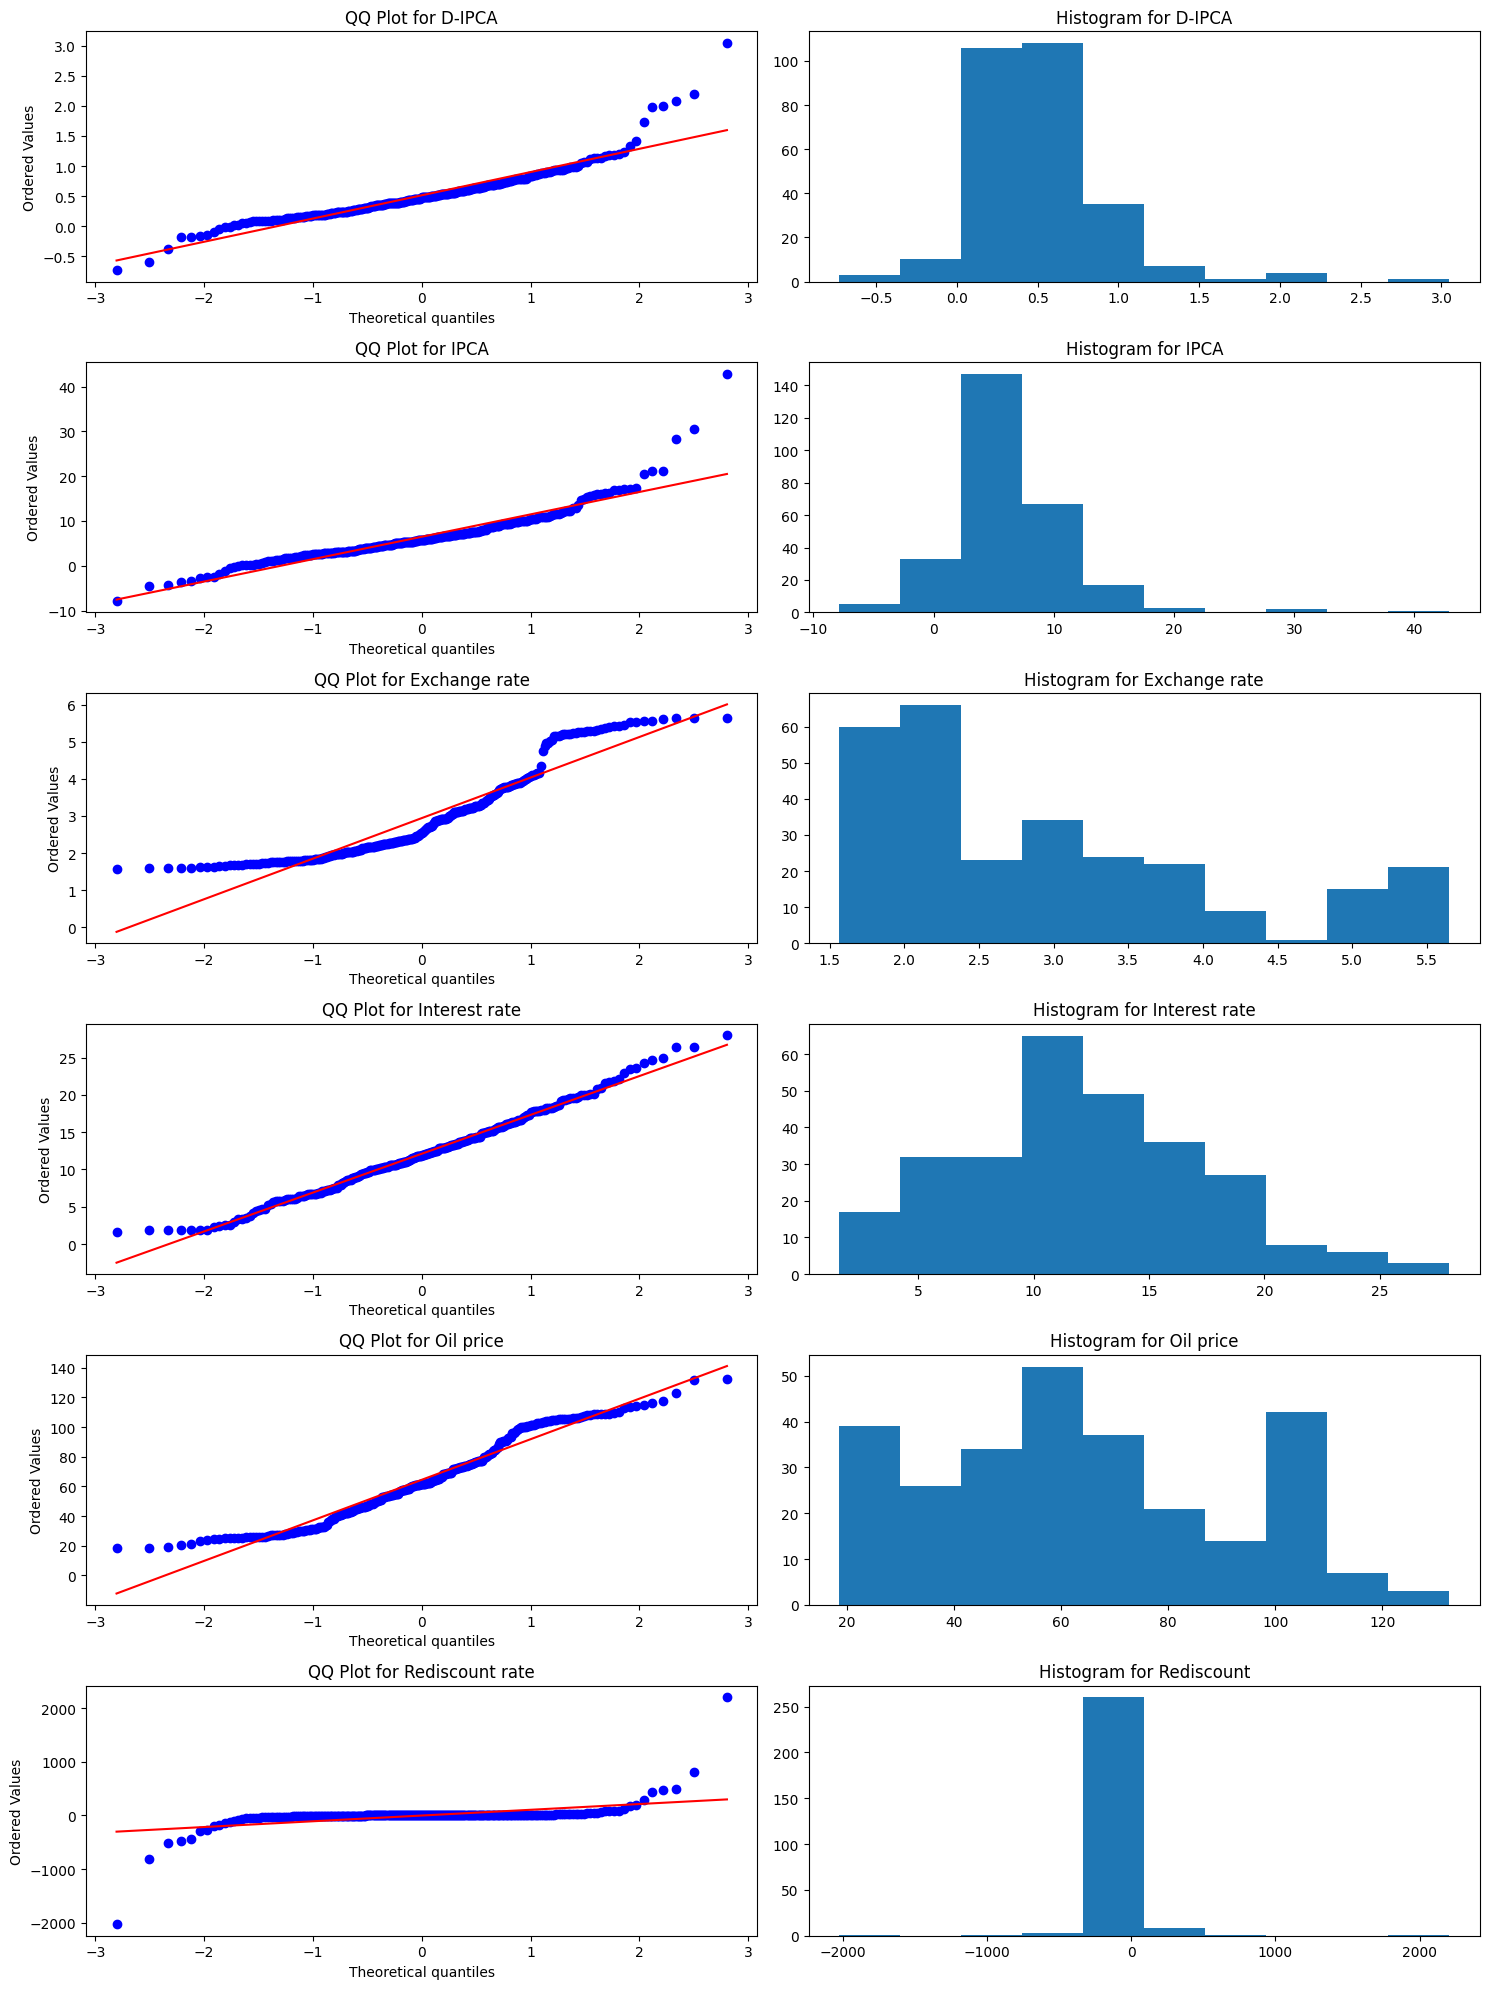

In [6]:
import scipy.stats
import pylab

fig, axs = pylab.subplots(6, 2, figsize=(15, 20))

scipy.stats.probplot(DF['D-IPCA'], plot=axs[0, 0])
axs[0, 0].set_title("QQ Plot for D-IPCA")
axs[0, 1].hist(DF['D-IPCA'], bins=10)
axs[0, 1].set_title("Histogram for D-IPCA")

scipy.stats.probplot(DF['IPCA'], plot=axs[1, 0])
axs[1, 0].set_title("QQ Plot for IPCA")
axs[1, 1].hist(DF['IPCA'], bins=10)
axs[1, 1].set_title("Histogram for IPCA")

scipy.stats.probplot(DF['Exchange rate'], plot=axs[2, 0])
axs[2, 0].set_title("QQ Plot for Exchange rate")
axs[2, 1].hist(DF['Exchange rate'], bins=10)
axs[2, 1].set_title("Histogram for Exchange rate")

scipy.stats.probplot(DF['Interest rate'], plot=axs[3, 0])
axs[3, 0].set_title("QQ Plot for Interest rate")
axs[3, 1].hist(DF['Interest rate'], bins=10)
axs[3, 1].set_title("Histogram for Interest rate")

scipy.stats.probplot(DF['Oil price'], plot=axs[4, 0])
axs[4, 0].set_title("QQ Plot for Oil price")
axs[4, 1].hist(DF['Oil price'], bins=10)
axs[4, 1].set_title("Histogram for Oil price")

scipy.stats.probplot(DF['Rediscount'], plot=axs[5, 0])
axs[5, 0].set_title("QQ Plot for Rediscount rate")
axs[5, 1].hist(DF['Rediscount'], bins=10)
axs[5, 1].set_title("Histogram for Rediscount")

pylab.tight_layout()
pylab.show()

# Correlation Matrix

In [129]:
DF.corr()

D-IPCA      IPCA       GDP  Exchange rate  Interest rate   
D-IPCA         1.000000  0.853147 -0.073937       0.106269       0.200407  \
IPCA           0.853147  1.000000 -0.074284       0.118122       0.194443   
GDP           -0.073937 -0.074284  1.000000       0.735226      -0.660383   
Exchange rate  0.106269  0.118122  0.735226       1.000000      -0.321425   
Interest rate  0.200407  0.194443 -0.660383      -0.321425       1.000000   
Oil price     -0.106086 -0.121783  0.377361      -0.200495      -0.436340   
Rediscount    -0.004662 -0.071108  0.002825      -0.010635      -0.014727   

               Oil price  Rediscount  
D-IPCA         -0.106086   -0.004662  
IPCA           -0.121783   -0.071108  
GDP             0.377361    0.002825  
Exchange rate  -0.200495   -0.010635  
Interest rate  -0.436340   -0.014727  
Oil price       1.000000    0.000912  
Rediscount      0.000912    1.000000

# Stationarity

In [7]:
import statsmodels.tsa.stattools as sts 

cols = DF.columns.drop('DATE')

dft = pd.DataFrame(columns = ['Serie', 'DF-test', 'p-value', 'lags', 'obs', 'stationarity'])
serie = []
df_test = []
p = []
lags = []
obs = []

for col in cols:
    serie.append(col)
    df_test.append(sts.adfuller(DF[col])[0])
    p.append(sts.adfuller(DF[col])[1])
    lags.append(sts.adfuller(DF[col])[2])
    obs.append(sts.adfuller(DF[col])[3])
    
dft['Serie'] = serie
dft['DF-test'] = df_test
dft['p-value'] = p
dft['lags'] = lags
dft['obs'] = obs

# stationarity_DFtest = []
# for i in dft['DF-test']:
#     if i < list(sts.adfuller(DF['IPCA'])[4].values())[0]:
#         stationarity_DFtest.append('1%')
#     elif i < list(sts.adfuller(DF['IPCA'])[4].values())[1] and i > list(sts.adfuller(DF['IPCA'])[4].values())[0]:
#         stationarity_DFtest.append('5%')
#     elif i < list(sts.adfuller(DF['IPCA'])[4].values())[2] and i > list(sts.adfuller(DF['IPCA'])[4].values())[1]:
#         stationarity_DFtest.append('10%')
#     else: 
#         stationarity_DFtest.append('non-stationary')

stationarity_pvalue = []
for i in dft['p-value']:
    if i < 0.01:
        stationarity_pvalue.append('1%')
    elif i < 0.05 and i > 0.01:
        stationarity_pvalue.append('5%')
    elif i < 0.1 and i > 0.05:
        stationarity_pvalue.append('10%')
    else: 
        stationarity_pvalue.append('non-stationary')

dft['stationarity'] = stationarity_pvalue

print('Dickey-Fuller test')
print(sts.adfuller(DF['IPCA'])[4])
print()
print(dft)

Dickey-Fuller test
{'1%': -3.4544435065994437, '5%': -2.8721468827772774, '10%': -2.572422013959188}

           Serie   DF-test       p-value  lags  obs    stationarity
0         D-IPCA -7.770682  8.938315e-12     0  274              1%
1           IPCA -7.928191  3.571504e-12     0  274              1%
2            GDP  2.360468  9.989905e-01    12  262  non-stationary
3  Exchange rate -0.609320  8.688622e-01     1  273  non-stationary
4  Interest rate -1.940088  3.134435e-01    12  262  non-stationary
5      Oil price -2.690773  7.564864e-02     1  273             10%
6     Rediscount -8.846897  1.611603e-14     7  267              1%


As expected, price-related time-series, such as Exchange and Interest rates, are not stationarity, since they behave like a random-walk process. Oil price is considered stationary, but at a very low significance level, 10%; one reason for this might be that oil prices do not behave freely as usual prices, but are determined by a cartel. 

# Decomposition

In [26]:
DF['DATE'] = pd.to_datetime(DF['DATE'])
DF = DF.set_index('DATE')

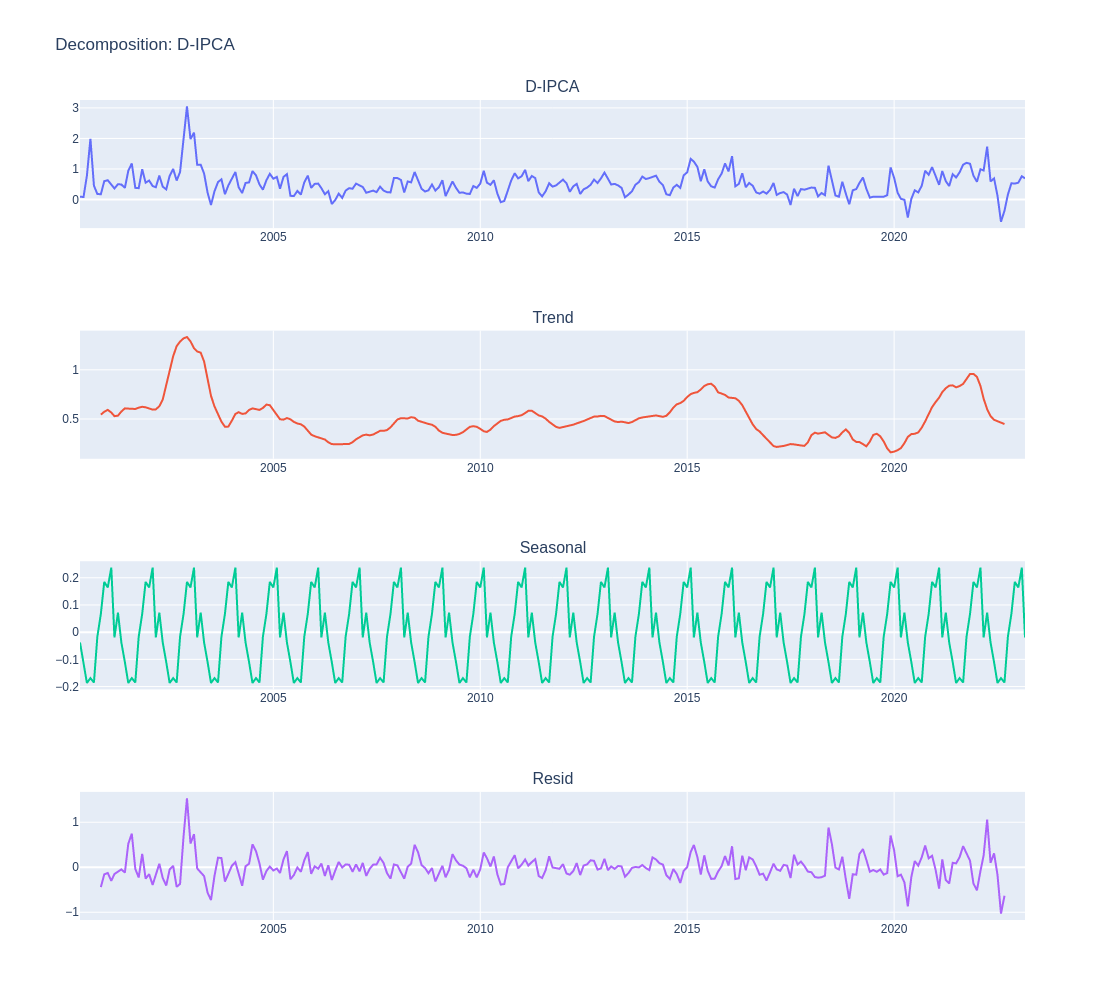

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['D-IPCA']) 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('D-IPCA', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['D-IPCA'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: D-IPCA', height=1000, width=1100)

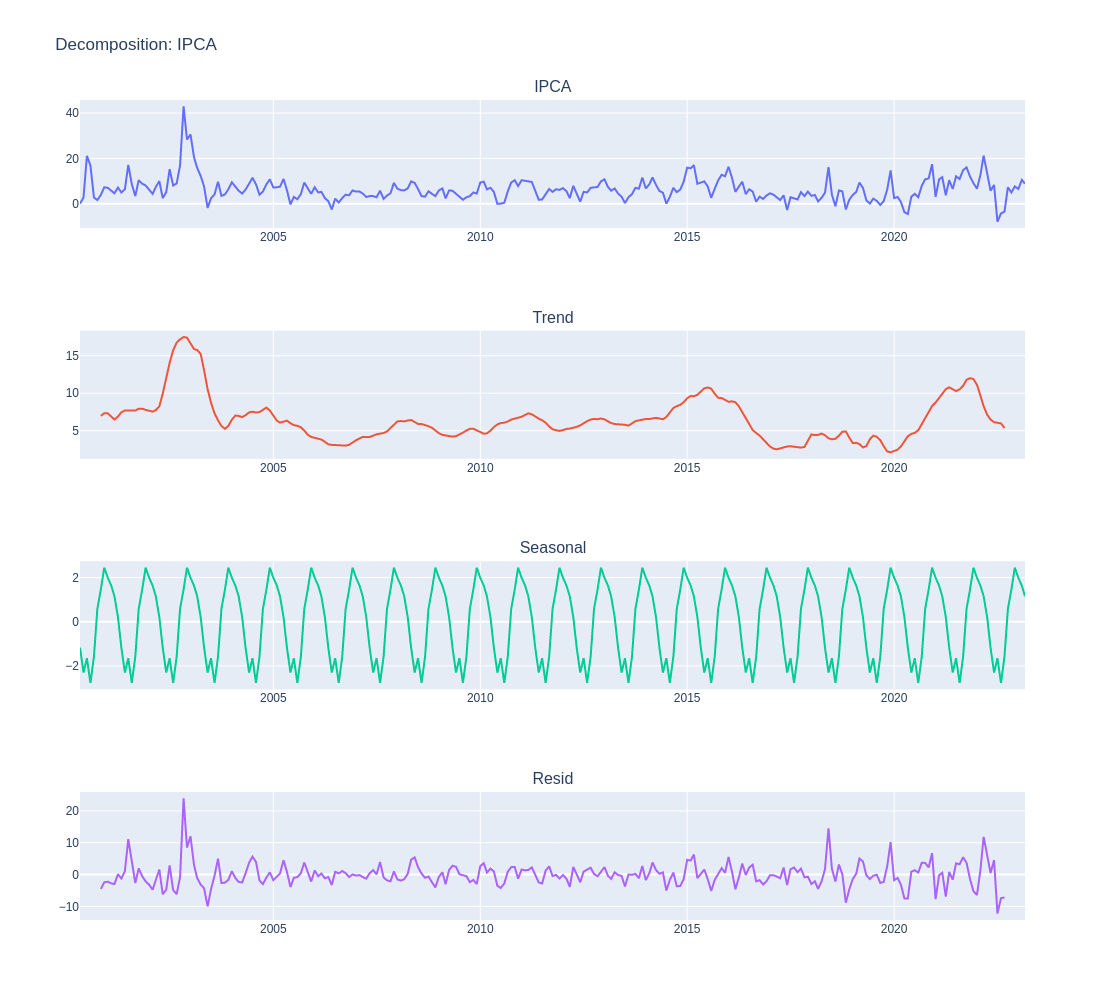

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['IPCA']) 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('IPCA', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['IPCA'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: IPCA', height=1000, width=1100)

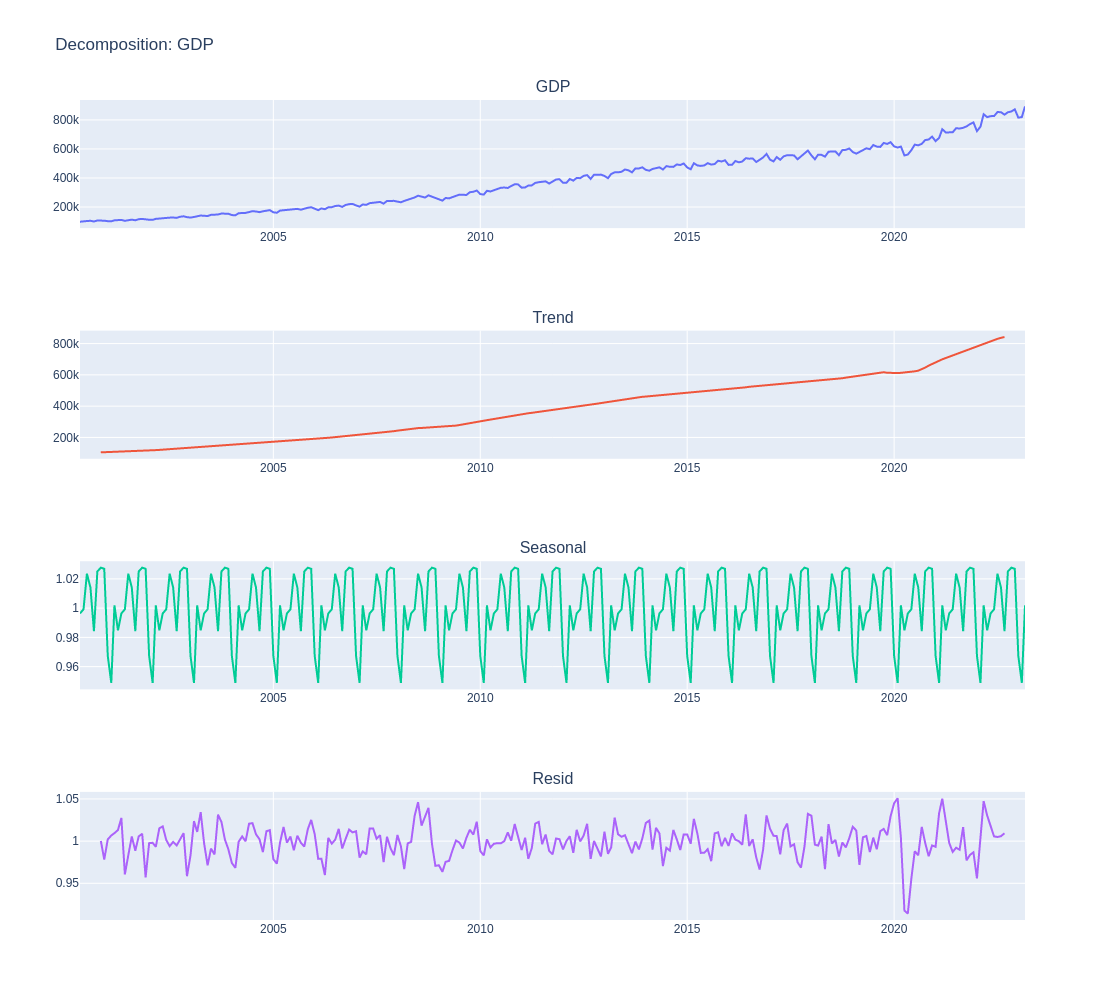

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['GDP'], model = 'multiplicative') 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('GDP', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['GDP'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: GDP', height=1000, width=1100)

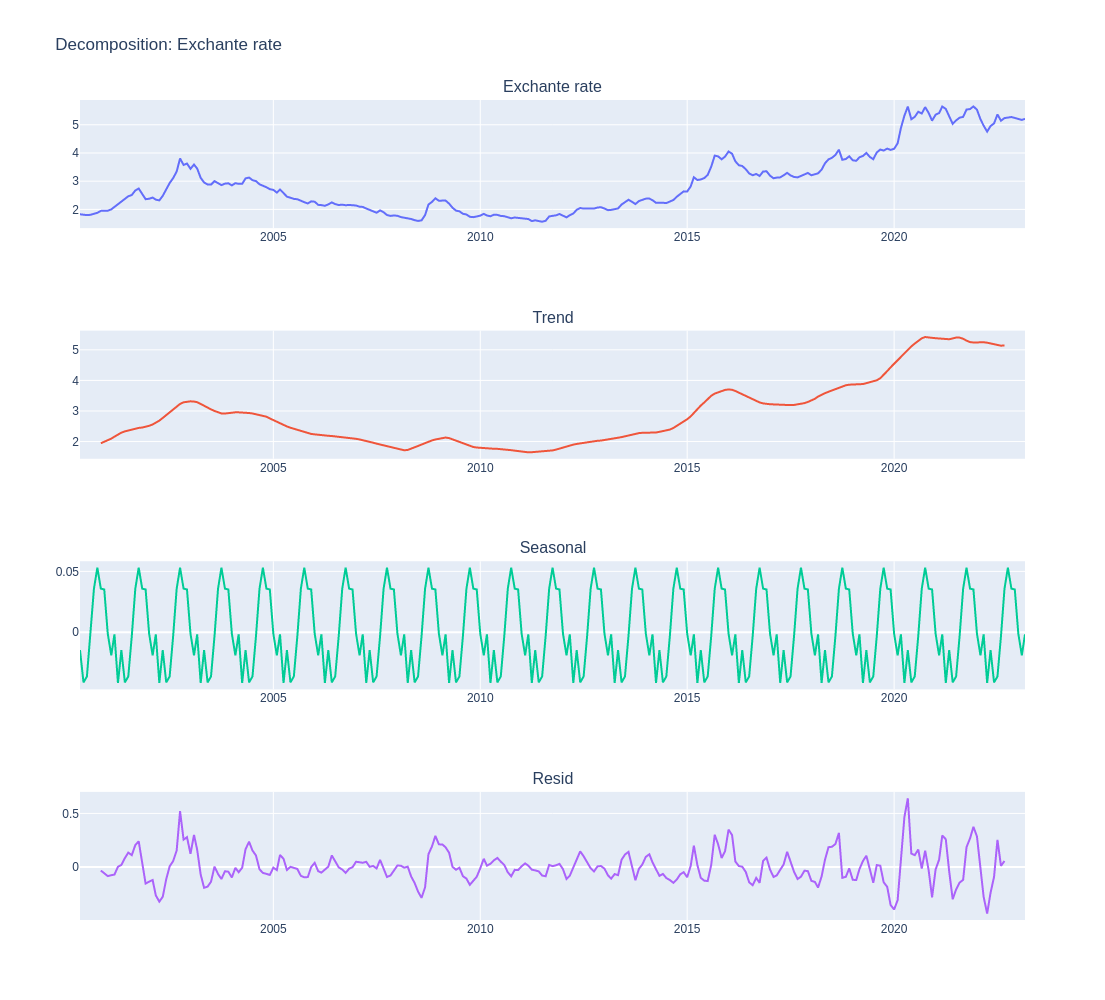

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['Exchange rate']) 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('Exchante rate', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['Exchange rate'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: Exchante rate', height=1000, width=1100)

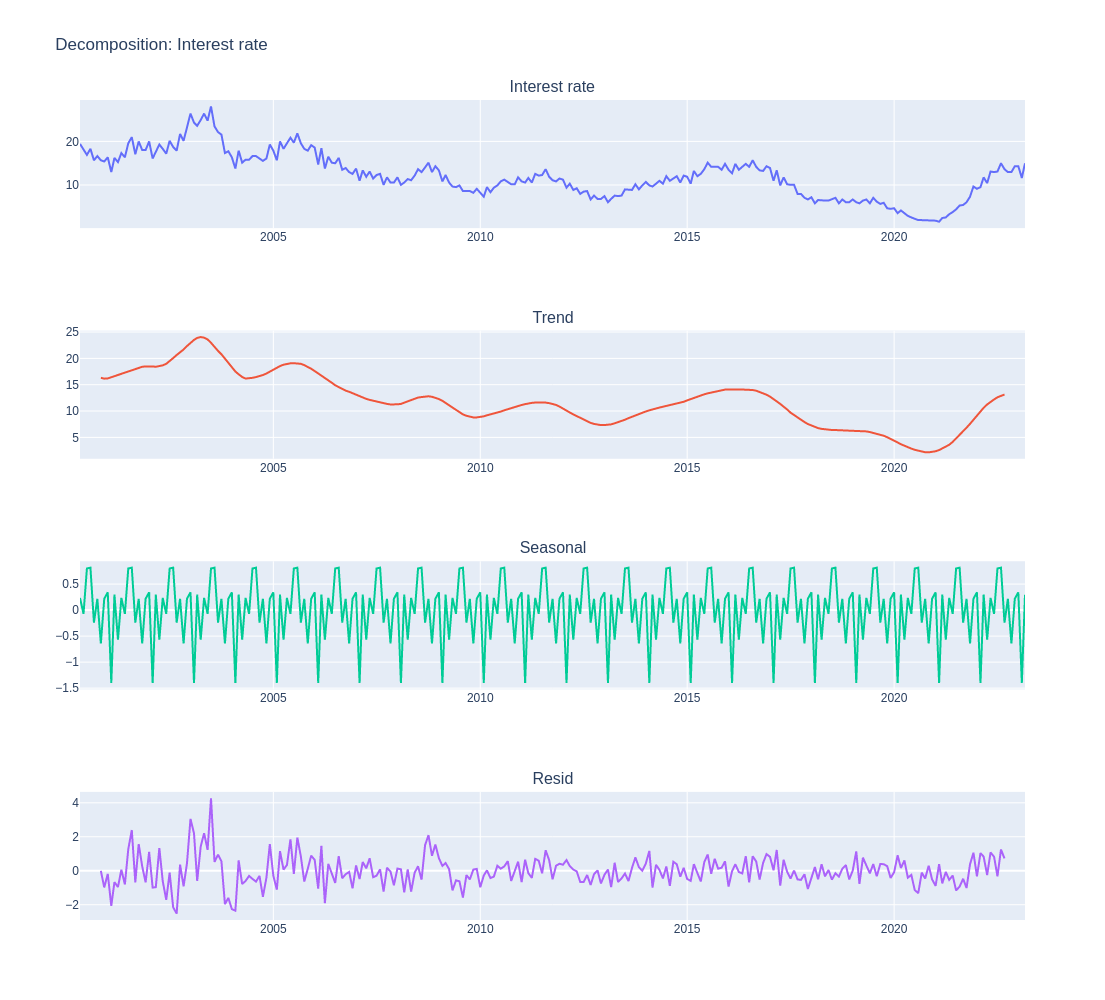

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['Interest rate']) 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('Interest rate', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['Interest rate'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: Interest rate', height=1000, width=1100)

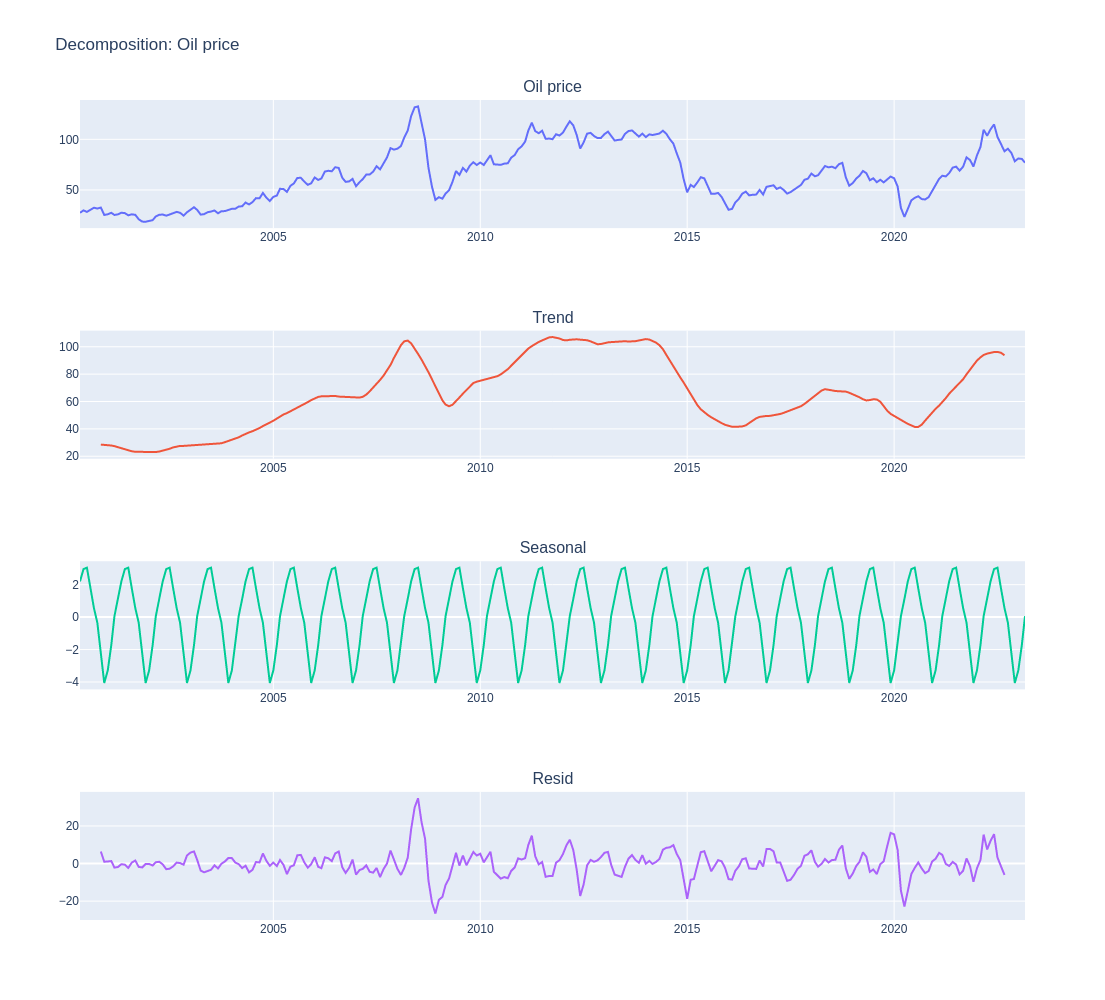

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['Oil price']) 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('Oil price', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['Oil price'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: Oil price', height=1000, width=1100)

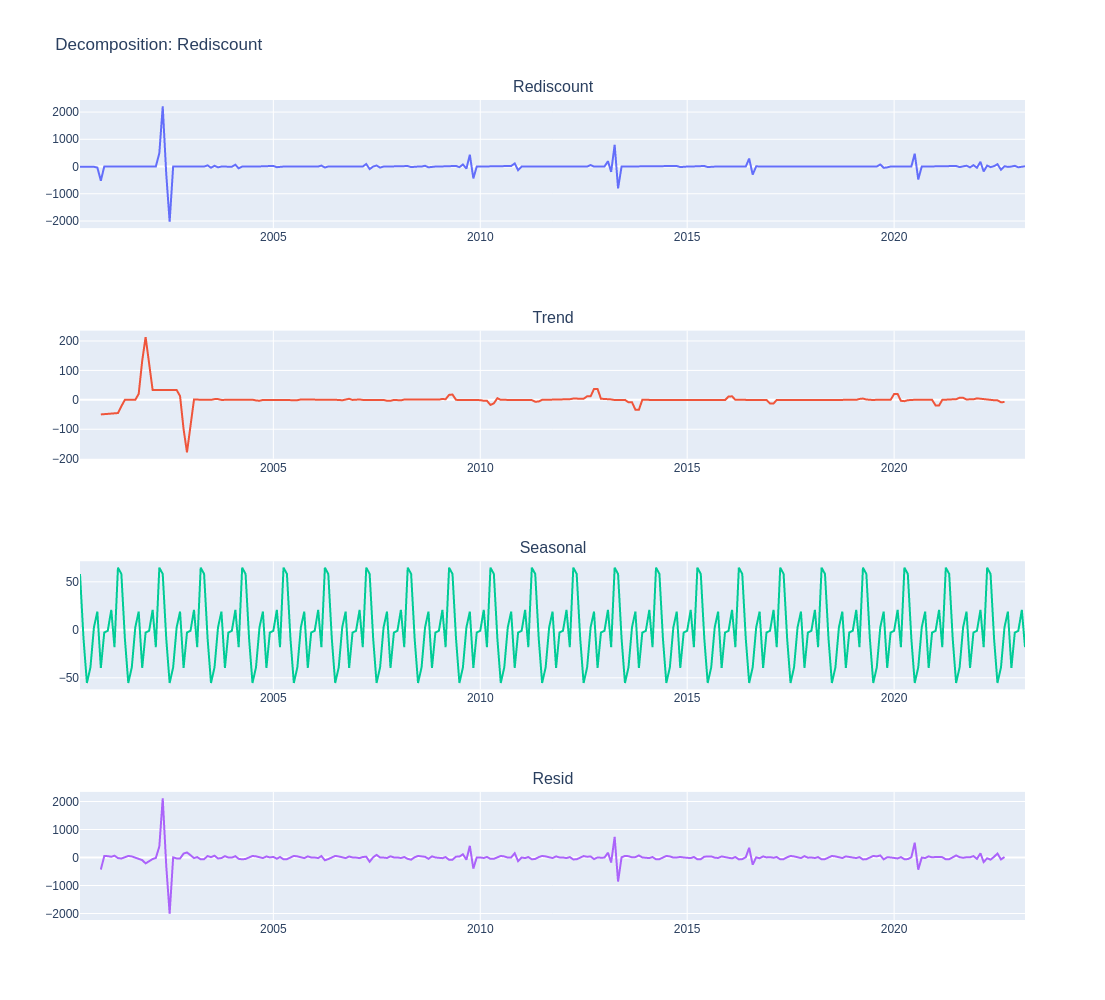

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

s = seasonal_decompose(DF['Rediscount']) 

grid = make_subplots(rows = 4, cols = 1, subplot_titles=('Rediscount', 'Trend', 'Seasonal', 'Resid'))
grid.add_trace(go.Scatter(x = DF.index, y = DF['Rediscount'], showlegend=False), row=1, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.trend, showlegend=False), row=2, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.seasonal, showlegend=False), row=3, col=1)
grid.add_trace(go.Scatter(x = DF.index, y = s.resid, showlegend=False), row=4, col=1)

grid.update_layout(title = 'Decomposition: Rediscount', height=1000, width=1100)

# Autocorrelation Functions

In [126]:
DF.columns

Index(['D-IPCA', 'IPCA', 'GDP', 'Exchange rate', 'Interest rate', 'Oil price',
       'Rediscount'],
      dtype='object')

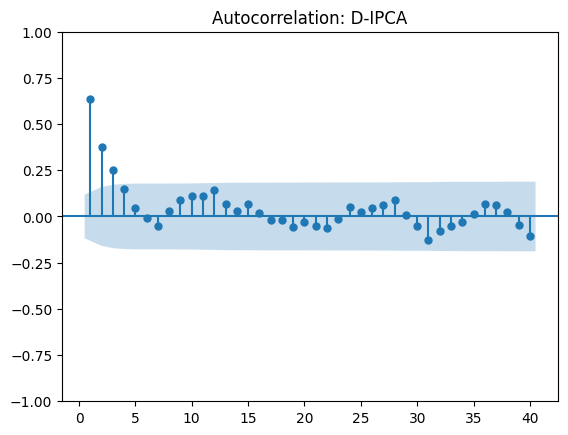

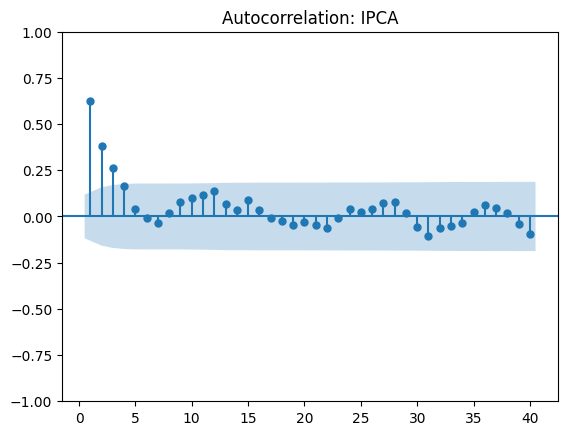

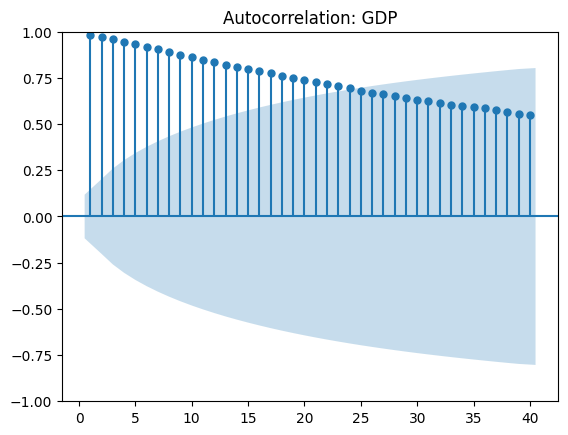

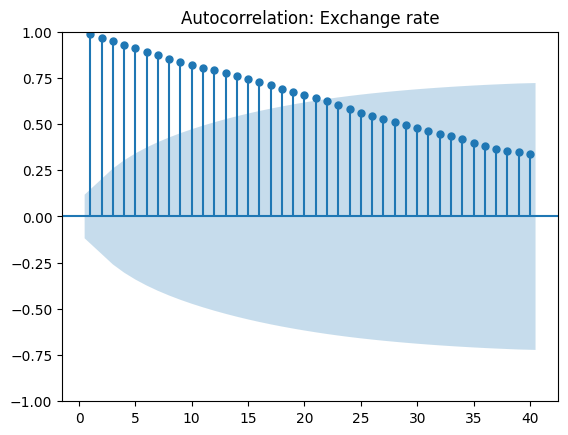

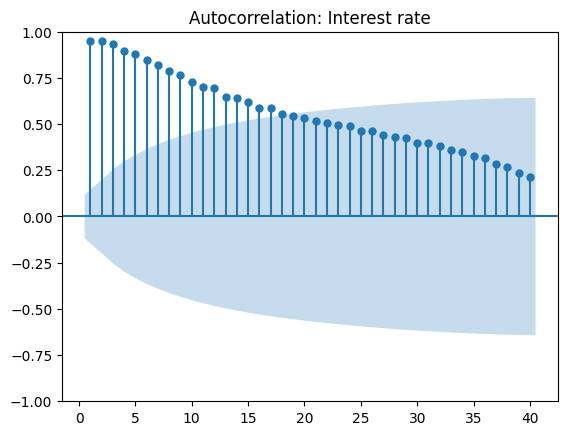

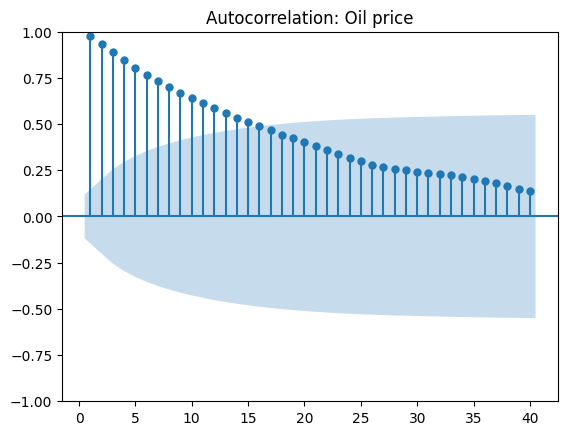

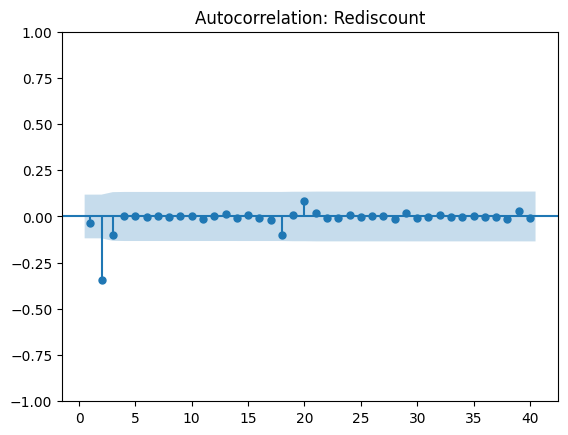

In [128]:
import statsmodels.graphics.tsaplots as sgt 

for col in DF.columns:
    s = sgt.plot_acf(DF[col], lags = 40, 
                     zero = False, alpha = 0.05, 
                     title='Autocorrelation: {}'.format(col))